<a href="https://colab.research.google.com/github/YogitaChaudhari52/Yogita_Chaudhari/blob/main/CNN_and_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Malaria Parasite Detection Using CNN

In [3]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5 MB 36 kB/s 
     |████████████████████████████████| 4.3 MB 42.4 MB/s 
     |████████████████████████████████| 501 kB 66.1 MB/s 
     |████████████████████████████████| 50 kB 9.4 MB/s 


In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.5.0


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!git clone https://github.com/YogitaChaudhari52/Malaria-Detection-Using-Maching-Learning.git

Cloning into 'Malaria-Detection-Using-Maching-Learning'...
remote: Enumerating objects: 27619, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 27619 (delta 13), reused 50 (delta 13), pack-reused 27569
Receiving objects: 100% (27619/27619), 332.66 MiB | 23.52 MiB/s, done.
Resolving deltas: 100% (13/13), done.
Checking out files: 100% (27562/27562), done.


In [8]:
img_width = 244
img_height = 244

In [8]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [9]:
train_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Detection-Using-Maching-Learning/cell_images',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'training'
                                                   )

Found 22048 images belonging to 2 classes.


In [10]:
validation_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Detection-Using-Maching-Learning/cell_images',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'validation'
                                                   )

Found 5510 images belonging to 2 classes.


In [11]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

## CNN Model Building

In [12]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 242, 242, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 121, 121, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 121, 121, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 119, 119, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 59, 59, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 111392)            0

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [15]:
history = model.fit_generator(generator=train_data_generator,
                              steps_per_epoch = len(train_data_generator),
                              epochs = 5,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator))

Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1378/1378 [==============================] - 157s 114ms/step - loss: 0.5658 - accuracy: 0.7064 - val_loss: 0.3302 - val_accuracy: 0.9120
Epoch 2/5
1378/1378 [==============================] - 154s 112ms/step - loss: 0.2982 - accuracy: 0.9137 - val_loss: 0.3237 - val_accuracy: 0.9258
Epoch 3/5
1378/1378 [==============================] - 153s 111ms/step - loss: 0.2762 - accuracy: 0.9299 - val_loss: 0.3080 - val_accuracy: 0.9267
Epoch 4/5
1378/1378 [==============================] - 152s 110ms/step - loss: 0.2492 - accuracy: 0.9349 - val_loss: 0.2991 - val_accuracy: 0.9256
Epoch 5/5
1378/1378 [==============================] - 152s 110ms/step - loss: 0.2356 - accuracy: 0.9359 - val_loss: 0.3340 - val_accuracy: 0.9211


In [16]:
history.history

{'accuracy': [0.70641327, 0.91373366, 0.92988026, 0.9349147, 0.93591255],
 'loss': [0.5658328521656107,
  0.2981678306186607,
  0.2762429123718686,
  0.24919486148059855,
  0.23557833917351123],
 'val_accuracy': [0.91197824, 0.9257713, 0.9266788, 0.92558986, 0.92105263],
 'val_loss': [0.3301972543415816,
  0.32373712539024974,
  0.3079933503345735,
  0.29913307837062125,
  0.33395537205877296]}

In [17]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

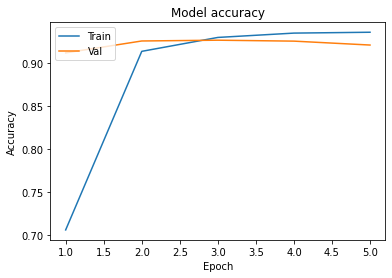

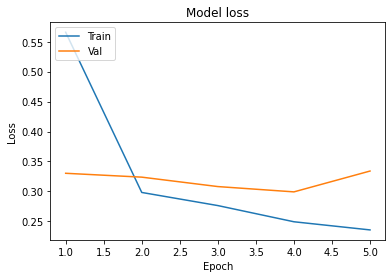

In [18]:
plot_learningCurve(history, 5)

**VGG 16**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob
import cv2

In [2]:
data = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [5]:
# traini_Set with image_size=(224,224),class_mode='binary' and subset='training'
train_set=data.flow_from_directory(directory='/content/Malaria-Detection-Using-Maching-Learning/cell_images',                           
                                   target_size=(150,150),
                                    class_mode='binary',
                                    batch_size=20,
                                    subset='training')

Found 22048 images belonging to 2 classes.


In [6]:
# test_set with same features but subset='validation'
test_set=data.flow_from_directory(directory='/content/Malaria-Detection-Using-Maching-Learning/cell_images',
                                   target_size=(150,150),
                                    class_mode='binary',
                                    batch_size=20,
                                    subset='validation'
                                   )

Found 5510 images belonging to 2 classes.


In [7]:
# weights initialisation from imagenet nad top layer is not included since we have our own categories
vgg19=VGG19(input_shape=[150,150,3],weights='imagenet',include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


In [8]:
# we don't want to train the vgg19 model layers again
for layer in vgg19.layers:
    layer.trainable=False

In [9]:
# adding our own flatten layer
x=Flatten()(vgg19.output)
# creating a prediction dense layer with activation of softmax after x layer created above
prediction=Dense(2,activation='softmax')(x)
# model is created with inputs from vgg19 and outputs as our prediction layer
model=Model(inputs=vgg19.input,outputs=prediction)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [11]:
# compiling of our customized model
model.compile(
  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# fitting our training data and saving results in history 
history = model.fit_generator(generator = train_set,
                              validation_data = test_set,
                              epochs =15)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1103/1103 [==============================] - 248s 183ms/step - loss: 0.3609 - accuracy: 0.8342 - val_loss: 0.2809 - val_accuracy: 0.8824
Epoch 2/15
1103/1103 [==============================] - 198s 180ms/step - loss: 0.2033 - accuracy: 0.9213 - val_loss: 0.2469 - val_accuracy: 0.9020
Epoch 3/15
1103/1103 [==============================] - 198s 179ms/step - loss: 0.1786 - accuracy: 0.9330 - val_loss: 0.2220 - val_accuracy: 0.9145
Epoch 4/15
1103/1103 [==============================] - 198s 179ms/step - loss: 0.1701 - accuracy: 0.9361 - val_loss: 0.2076 - val_accuracy: 0.9185
Epoch 5/15
1103/1103 [==============================] - 198s 179ms/step - loss: 0.1623 - accuracy: 0.9406 - val_loss: 0.2090 - val_accuracy: 0.9220
Epoch 6/15
1103/1103 [==============================] - 198s 179ms/step - loss: 0.1615 - accuracy: 0.9402 - val_loss: 0.2856 - val_accuracy: 0.8991
Epoch 7/15
1103/1103 [==============================] - 198s 179ms/step - loss: 0.1531 - accuracy: 0.9425 - val_loss: 0.213

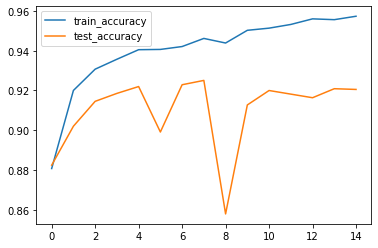

In [13]:
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='test_accuracy')
plt.legend()
plt.show()

In [14]:
# saving our model in a .h5 file
from tensorflow.keras.models import load_model
model.save('malaria_vgg19.h5')

In [15]:
y_pred=model.predict(test_set)
y_pred[:10]

array([[5.5972137e-02, 9.4402784e-01],
       [9.9943870e-01, 5.6130160e-04],
       [3.4372471e-02, 9.6562749e-01],
       [1.4484651e-02, 9.8551536e-01],
       [7.3726647e-02, 9.2627341e-01],
       [4.3776090e-04, 9.9956220e-01],
       [9.9646831e-01, 3.5317035e-03],
       [1.0580463e-02, 9.8941958e-01],
       [9.7170466e-01, 2.8295280e-02],
       [6.2322003e-01, 3.7677994e-01]], dtype=float32)

In [16]:
predictions=np.argmax(y_pred,axis=1)
predictions[:10]

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 0])